In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
"""Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.
"""

'Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining \nhow many dummy variables you have created and RMSE value for each model. Finally which model you will use for \nForecasting.\n'

In [9]:
# load the data set using pandas
data = pd.read_excel("E:\\Forecasting\\CocaCola_Sales_Rawdata.xlsx")
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [10]:
# creating a data frame using pandas
df=pd.DataFrame(data)
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
...,...,...
37,Q2_95,4936.000000
38,Q3_95,4895.000000
39,Q4_95,4333.000000
40,Q1_96,4194.000000


In [11]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


<AxesSubplot: >

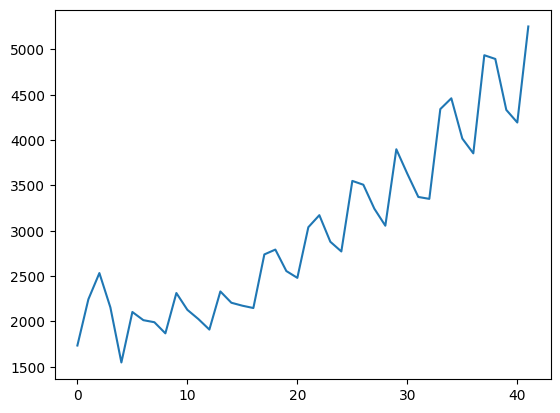

In [12]:
df['Sales'].plot()

array([[<AxesSubplot: title={'center': 'Sales'}>]], dtype=object)

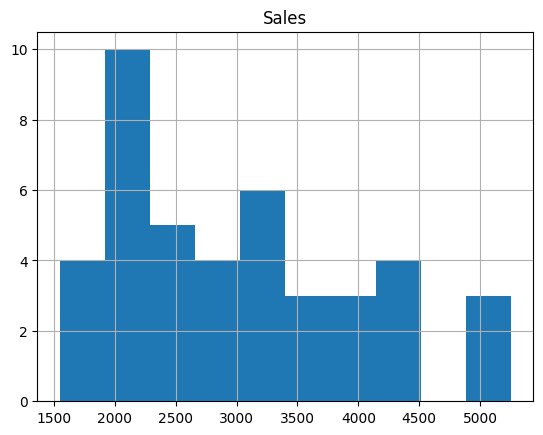

In [13]:
df.hist()

<AxesSubplot: xlabel='Sales', ylabel='Density'>

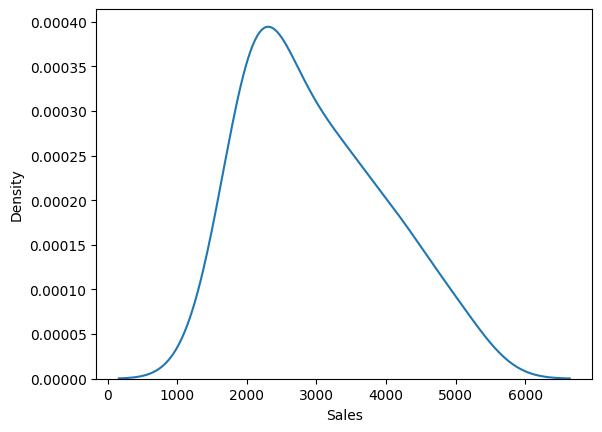

In [14]:
sns.distplot(df['Sales'], hist=False)

In [17]:
# converting the quarter sales into quarters
df['quart'] = 0
for i in range(42):
    p = df['Quarter'][i]
    df['quart'][i] = p[0:2]

In [18]:
df.head()

,Quarter,Sales,quart
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [19]:
dummies  = pd.DataFrame(pd.get_dummies(df['quart']))

In [20]:
cola = pd.concat([df,dummies],axis=1)

In [22]:
cola.head()
# created a total of 4 dummy columns using the generated quart column

,Quarter,Sales,quart,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [23]:
# for actually performing forecasting we have to create dummy variable columns ,t2 value column and log values columns
cola['t'] = np.arange(0,42)
cola['t_sqr'] = cola['t']*cola['t']
cola['log_sales'] = np.log(cola['Sales'])
cola.head()

,Quarter,Sales,quart,Q1,Q2,Q3,Q4,t,t_sqr,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,0,0,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,1,1,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,2,4,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,3,9,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,4,16,7.344602


<AxesSubplot: xlabel='quart', ylabel='Sales'>

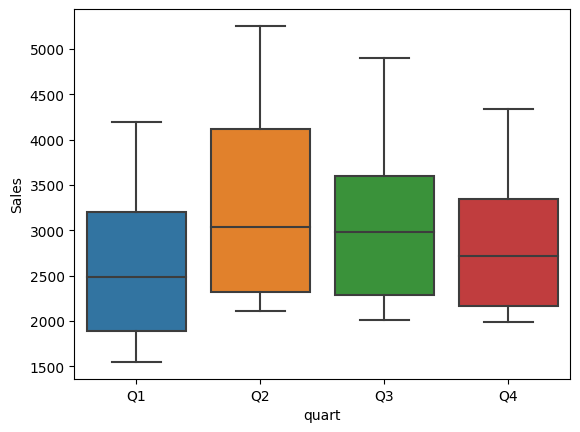

In [24]:
# plotting a boxplot will help us in frequency of data and outlier detection ((yearly passenngers))
sns.boxplot(x="quart",y="Sales",data=cola)

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

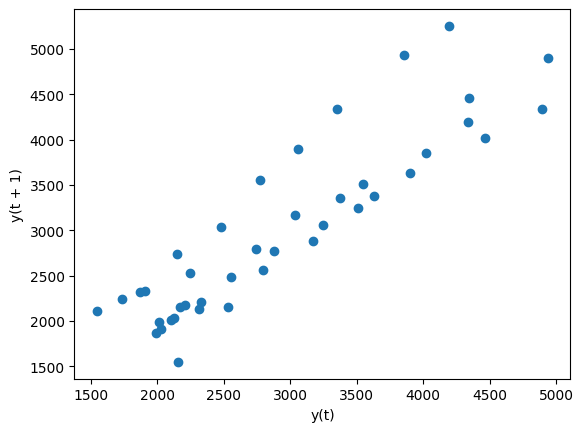

In [16]:
pd.plotting.lag_plot(cola['Sales'])

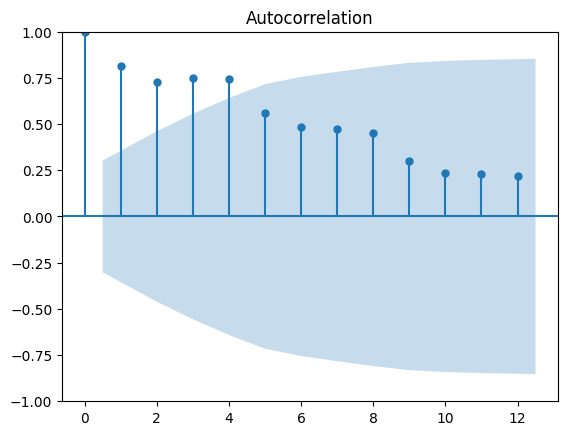

In [26]:
# now its time for time series analysis plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cola['Sales'],lags=12)
plt.show()

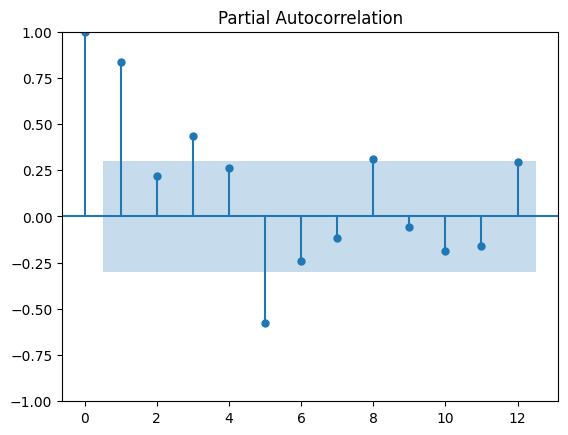

In [19]:
tsa_plots.plot_pacf(cola['Sales'],lags=12)
plt.show()

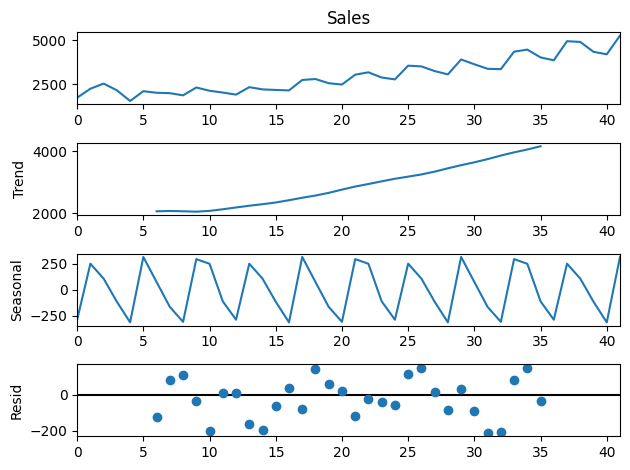

In [27]:
# analyzing the seasonal trends
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decompose = seasonal_decompose(cola['Sales'],period = 12)
ts_decompose.plot()
plt.show()

In [28]:
# the seasonal graph actually show us that the data is having Multiplicative seasonality
# the trend graph actually show us that the data is having non seasonal seasonality and its gradually increasing

In [29]:
# splitting the data into two parts to make prediction and create forecasting with train data and checking it with the test data
train = cola.head(30)
test = cola.tail(12)

In [30]:
train.tail()

,Quarter,Sales,quart,Q1,Q2,Q3,Q4,t,t_sqr,log_sales
25,Q2_92,3550.000000,Q2,0,1,0,0,25,625,8.174703
26,Q3_92,3508.000000,Q3,0,0,1,0,26,676,8.162801
27,Q4_92,3243.859993,Q4,0,0,0,1,27,729,8.084519
28,Q1_93,3056.000000,Q1,1,0,0,0,28,784,8.024862
29,Q2_93,3899.000000,Q2,0,1,0,0,29,841,8.268475


In [31]:
test.head()

,Quarter,Sales,quart,Q1,Q2,Q3,Q4,t,t_sqr,log_sales
30,Q3_93,3629.0,Q3,0,0,1,0,30,900,8.196712
31,Q4_93,3373.0,Q4,0,0,0,1,31,961,8.123558
32,Q1_94,3352.0,Q1,1,0,0,0,32,1024,8.117312
33,Q2_94,4342.0,Q2,0,1,0,0,33,1089,8.376090
34,Q3_94,4461.0,Q3,0,0,1,0,34,1156,8.403128


# Model based forecasting

### linear model

In [32]:
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t',data = train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
print('RMSE Linear:',rmse_linear)

RMSE Linear: 714.014448328131


### Exponential model

In [33]:
exponential_model = smf.ols('log_sales~t',data = train).fit()
pred_exponential = pd.Series(exponential_model.predict(pd.DataFrame(test['t'])))
rmse_exponential = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exponential)))**2))
print('RMSE exponential:',rmse_exponential)

RMSE exponential: 552.282103907945


### Quadratic model

In [34]:
quadratic_model = smf.ols('Sales~t+t_sqr',data=train).fit()
pred_quadratic =  pd.Series(quadratic_model.predict(pd.DataFrame(test[['t','t_sqr']])))
rmse_quadratic = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quadratic))**2))
print("RMSE Quadratic: ",rmse_quadratic)

RMSE Quadratic:  646.2715428312097


### Additive seasonality

In [35]:
additive_seasonality_model = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_additive_seasonality =  pd.Series(additive_seasonality_model.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmse_additive_seasonality = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_additive_seasonality))**2))
print("RMSE Additive seasonality: ",rmse_additive_seasonality)

RMSE Additive seasonality:  1778.0065467941365


### Additive seasonality quadratic

In [36]:
additive_seasonality_qd_model = smf.ols('Sales~t+t_sqr+Q1+Q2+Q3+Q4',data=train).fit()
pred_additive_seasonality_qd =  pd.Series(additive_seasonality_qd_model.predict(pd.DataFrame(test[['t','t_sqr','Q1','Q2','Q3','Q4']])))
rmse_additive_seasonality_quadratic = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_additive_seasonality_qd))**2))
print("RMSE Additive seasonality quadratic: ",rmse_additive_seasonality_quadratic)

RMSE Additive seasonality quadratic:  586.053306787222


### Multiplicative seasonalty

In [40]:
mult_sea_model = smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_mult_sea =  pd.Series(mult_sea_model.predict(test))
rmse_multiplicative_seasonality = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_sea)))**2))
print("RMSE Multiplicative seasonality: ",rmse_multiplicative_seasonality)

RMSE Multiplicative seasonality:  1828.9238912138114


### Multiplicative additive seasonality

In [41]:
mult_add_sea_model = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=train).fit()
pred_mult_add_sea =  pd.Series(mult_add_sea_model.predict(test))
rmse_multiplicative_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_add_sea)))**2))
print("RMSE Multiplicative additive seasonality: ",rmse_multiplicative_add_sea)

RMSE Multiplicative additive seasonality:  410.24970596103617


In [42]:
#make a table containing accuracy score value for each value of k_neighbors
scores={'Forecasting Model':["Linear","Exponential","Quadratic","Additive Seasonality","Additive Seasonality Quadratic","Multiplicative Seasonality","Multiplicative Additive Seasonality"],'RMSE_scores':[rmse_linear,rmse_exponential,rmse_quadratic,rmse_additive_seasonality,rmse_additive_seasonality_quadratic,rmse_multiplicative_seasonality,rmse_multiplicative_add_sea]}
table1=pd.DataFrame(scores)
table1

,Forecasting Model,RMSE_scores
0,Linear,714.014448
1,Exponential,552.282104
2,Quadratic,646.271543
3,Additive Seasonality,1778.006547
4,Additive Seasonality Quadratic,586.053307
5,Multiplicative Seasonality,1828.923891
6,Multiplicative Additive Seasonality,410.249706


In [43]:
# the model which has the lowest RMSE scores is the best model for forecasting this data
# the model with the lowest scores is Multiplicative Additive Seasonality

# Data driven forecasting

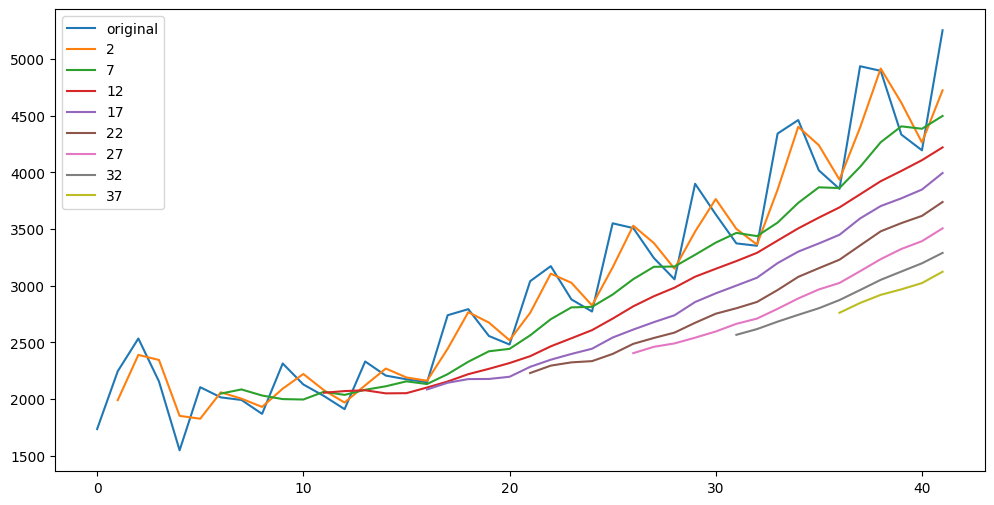

In [44]:
plt.figure(figsize=(12,6))
cola['Sales'].plot(label='original')
for i in range(2,40,5):
    cola['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

In [45]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,Holt,ExponentialSmoothing
ses_model = SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start=test.index[0],end=test.index[-1])
ses_rmse = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_ses))**2))
ses_rmse

1153.7031585725247

In [46]:
holt_model = Holt(train['Sales']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_holt = holt_model.predict(start=test.index[0],end=test.index[-1])
holt_rmse = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_holt))**2))
holt_rmse

559.5201160476229

In [48]:
hwe_model_a_m = ExponentialSmoothing(train["Sales"],seasonal="add",trend="mul",seasonal_periods=12).fit() 
pred_hwe_a_m = hwe_model_a_m.predict(start = test.index[0],end = test.index[-1])

hw_am_rms=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_hwe_a_m))**2))
hw_am_rms

330.04941437118373

In [49]:
hwe_model_a_a = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_a_a = hwe_model_a_a.predict(start = test.index[0],end = test.index[-1])

hw_aa_rms=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_hwe_a_a))**2))
hw_aa_rms

291.9184762806427

In [50]:
#make a table containing accuracy score value for each value of k_neighbors
scores={'Smoothing Model':["Simple exponential smoothing model","Holt model","Holts winter exponential smoothing with multiplicative seasonality and additive trend","Holts winter exponential smoothing with additive seasonality and multiplicative trend","Holts winter exponential smoothing with additive seasonality and additive trend"],'RMSE_scores':[ses_rmse,holt_rmse,hw_ma_rms,hw_am_rms,hw_aa_rms]}
table2=pd.DataFrame(scores)
table2

,Smoothing Model,RMSE_scores
0,Simple exponential smoothing model,1153.703159
1,Holt model,559.520116
2,Holts winter exponential smoothing with multiplicative seasonality and additive trend,364.485545
3,Holts winter exponential smoothing with additive seasonality and multiplicative trend,330.049414
4,Holts winter exponential smoothing with additive seasonality and additive trend,291.918476


In [51]:
# Holts winter exponential smoothing with additive seasonality and additive trend" has the lowest scores

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

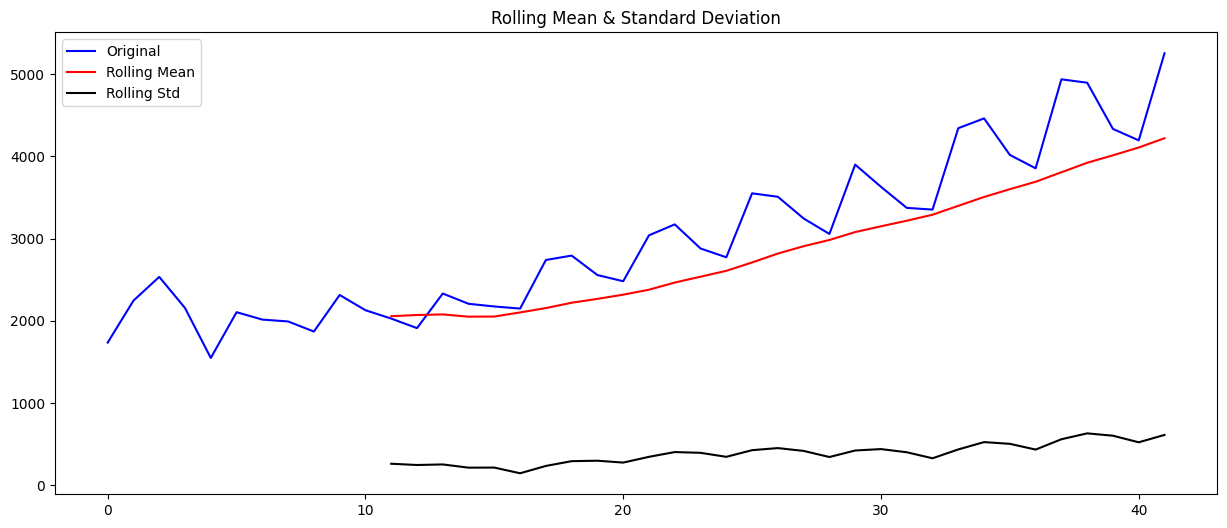

In [52]:
from statsmodels.tsa.arima_model import ARIMA,ARMA
plt.figure(figsize=(15,6))
rollingmean=cola['Sales'].rolling(12).mean()
rollingstd=cola['Sales'].rolling(12).std()
plt.plot(cola['Sales'], color='blue',label='Original')
plt.plot(rollingmean, color='red', label='Rolling Mean')
plt.plot(rollingstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

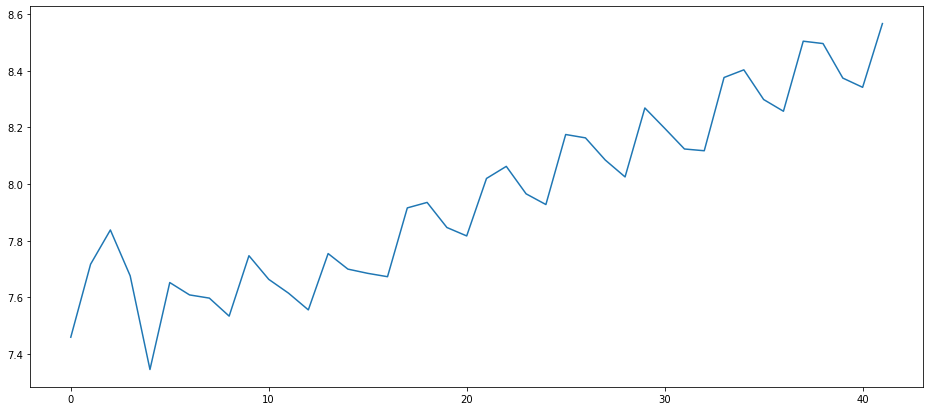

In [ ]:
plt.figure(figsize=(16,7))
ts_log = np.log(cola['Sales'])
plt.plot(ts_log)

#### -differencing

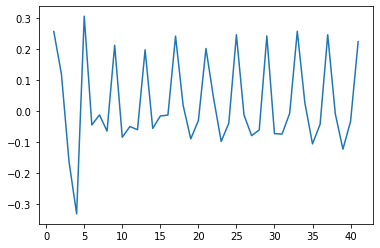

In [ ]:
ts_log_diff = ts_log - ts_log.shift(periods=1)
plt.plot(ts_log_diff)

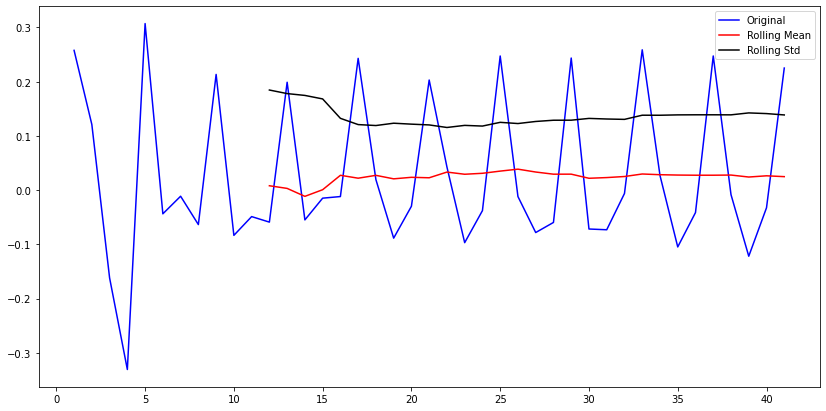

In [ ]:
plt.figure(figsize=(14,7))
rollingmean = ts_log_diff.rolling(12).mean()
rollingstd = ts_log_diff.rolling(12).std()
plt.plot(ts_log_diff, color='blue',label='Original')
plt.plot(rollingmean, color='red', label='Rolling Mean')
plt.plot(rollingstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')

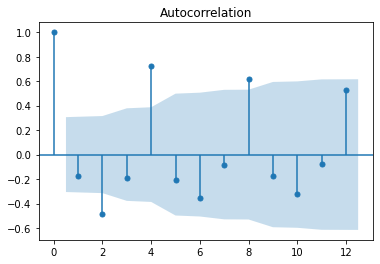

In [ ]:
tsa_plots.plot_acf(ts_log_diff.dropna(),lags=12)
plt.show()

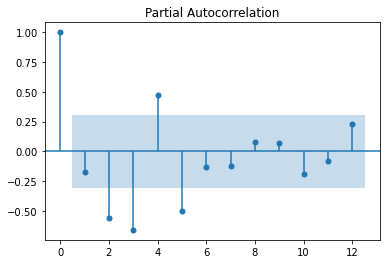

In [ ]:
tsa_plots.plot_pacf(ts_log_diff.dropna(),lags=12)
plt.show()

In [53]:
import itertools
p =range(0,5)
d =range(0,5)
q =range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [54]:
for params in pdq:
    try:
        arima_model = ARIMA(cola['Sales'],order=params).fit()
        print(params,arima_model.aic)
    except:
        continue

In [ ]:
ARMA_model = ARMA(train_data['Passengers'],order=(3,0)).fit()
pred_arma = ARMA_model.predict(start = test_data.index[0],end = test_data.index[-1])

arma_rmse=np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_arma))**2))
arma_rmse

In [ ]:
ARIMA_model = ARIMA(train['Sales'],order=(4,2,1)).fit()
pred_arima = ARIMA_model.predict(start = test.index[0],end = test.index[-1])

arima_rmse = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_arima))**2))
arima_rmse

4281.3041123749745

In [ ]:
table = {'Model':pd.Series(['Linear','Exponential','Quadratic','Additive Seasonality','Add_Sea_Quadratic','Multiplicative Sea','Multplicative_Add_Sea','SES','Holt','HWE_Mul_Add','HWE_Add_Mul','HWE_Add_Add','ARMA','ARIMA']),
        'RMSE_values':pd.Series([rmse_linear,rmse_exponential,rmse_quadratic,rmse_additive_seasonality,rmse_additive_seasonality_quadratic,rmse_multiplicative_seasonality,rmse_multiplicative_add_sea,ses_rmse,holt_rmse,hw_ma_rms,hw_am_rms,hw_aa_rms,arma_rmse,arima_rmse])}
table3 = pd.DataFrame(table)
table3

,Model,RMSE_values
0,Linear,714.014448
1,Exponential,552.282104
2,Quadratic,646.271543
3,Additive Seasonality,1778.006547
4,Add_Sea_Quadratic,586.053307
5,Multiplicative Sea,1828.923891
6,Multplicative_Add_Sea,410.249706
7,SES,1153.703124
8,Holt,559.520122
9,HWE_Mul_Add,213.540467


In [55]:
table1

,Forecasting Model,RMSE_scores
0,Linear,714.014448
1,Exponential,552.282104
2,Quadratic,646.271543
3,Additive Seasonality,1778.006547
4,Additive Seasonality Quadratic,586.053307
5,Multiplicative Seasonality,1828.923891
6,Multiplicative Additive Seasonality,410.249706


In [56]:
table2

,Smoothing Model,RMSE_scores
0,Simple exponential smoothing model,1153.703159
1,Holt model,559.520116
2,Holts winter exponential smoothing with multiplicative seasonality and additive trend,364.485545
3,Holts winter exponential smoothing with additive seasonality and multiplicative trend,330.049414
4,Holts winter exponential smoothing with additive seasonality and additive trend,291.918476


In [ ]:
""" so from the above three tables we can say that the best models are table1:"Multiplicative Additive Seasonality"
                                                                       table2:"Holts winter exponential smoothing with additive seasonality and Additive trend"
                                                                       table3:"ARMA model"" for this airlines dataset"""